# Bike Sharing Demand Exploratory Ananlytics Dictation

[bike-sharing/Exploratory Analytics.ipynb at master · dsleiter/bike-sharing](https://github.com/dsleiter/bike-sharing/blob/master/Exploratory%20Analytics.ipynb)

* 다른사람이 분석해 놓은 notebook을 따라해 보며 데이터를 탐색해 보고 연습함

* 위 데이터 는 https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset 데이터셋으로 분석하였고, 여기에서는 캐글의 데이터셋을 사용해 데이터를 탐색

* 위 데이터는 day와 time으로 나눈 데이터이고 여기에서 사용한 캐글 데이터는 날짜별로 나눈 데이터

Data Fields
from [Bike Sharing Demand | Kaggle](https://www.kaggle.com/c/bike-sharing-demand/data)

* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

In [1]:
from datetime import datetime

import numpy as np
import pandas as pd
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
# seaborn은  matplotlib을 사용하기 쉽게 wrapping해 놓은 것
import seaborn as sns
%matplotlib inline

# set defaults for flots
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 7
mpl.rcParams['axes.titlesize'] = 'x-large'
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.labelsize'] = 'x-large'
mpl.rcParams['axes.labelweight'] = 'bold'

def scatterplot_kwargs(*, color=None):
    return{
        'linestyle' : 'None',
        'marker' : 'o',
        'color' : color,
        'markerdgecolor' : color
    }


Import the data and see what it looks like
데이터를 로드해서 어떻게 생겼는지 관찰

In [2]:
datafile = 'data/train.csv'
df = pd.read_csv(datafile, parse_dates=["datetime"])
df.head()

# 카테고리 타입으로 강제함
for col in ['season', 'holiday', 'workingday', 'weather',]:
    df[col] = df[col].astype('category')

df.sample(5)   

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
380,2011-01-17 08:00:00,1,1,0,2,6.56,7.575,47,15.0013,3,30,33
7071,2012-04-13 00:00:00,2,0,1,1,16.40,20.455,37,16.9979,14,41,55
2882,2011-07-09 00:00:00,3,0,0,2,27.06,30.305,83,8.9981,31,90,121
9956,2012-10-19 05:00:00,4,0,1,2,22.14,25.760,88,0.0000,1,35,36
4539,2011-11-02 05:00:00,4,0,1,1,12.30,16.665,81,0.0000,0,27,27


In [3]:
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["day"] = df["datetime"].dt.day
df["hour"] = df["datetime"].dt.hour
df["minute"] = df["datetime"].dt.minute
df["second"] = df["datetime"].dt.second

print(df.shape)

(10886, 18)


In [4]:
for c in df.columns:
    print('-------------')
    print('column: {} (dtype: {})'.format(c, df[c].dtype))
    print('')
    print('Description:')
    print(df.describe())
    print('')
    print('Up to 10 most frequent values:')
    print(df[c].value_counts().iloc[:10])

-------------
column: datetime (dtype: datetime64[ns])

Description:
              temp         atemp      humidity     windspeed        casual  \
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.23086     23.655084     61.886460     12.799395     36.021955   
std        7.79159      8.474601     19.245033      8.164537     49.960477   
min        0.82000      0.760000      0.000000      0.000000      0.000000   
25%       13.94000     16.665000     47.000000      7.001500      4.000000   
50%       20.50000     24.240000     62.000000     12.998000     17.000000   
75%       26.24000     31.060000     77.000000     16.997900     49.000000   
max       41.00000     45.455000    100.000000     56.996900    367.000000   

         registered         count          year         month           day  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean     155.552177    191.574132   2011.501929      6.521495      9.9


Up to 10 most frequent values:
14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
Name: temp, dtype: int64
-------------
column: atemp (dtype: float64)

Description:
              temp         atemp      humidity     windspeed        casual  \
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.23086     23.655084     61.886460     12.799395     36.021955   
std        7.79159      8.474601     19.245033      8.164537     49.960477   
min        0.82000      0.760000      0.000000      0.000000      0.000000   
25%       13.94000     16.665000     47.000000      7.001500      4.000000   
50%       20.50000     24.240000     62.000000     12.998000     17.000000   
75%       26.24000     31.060000     77.000000     16.997900     49.000000   
max       41.00000     45.455000    100.000000     56.996900    367.000000   

         registered         count          year    

Description:
              temp         atemp      humidity     windspeed        casual  \
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.23086     23.655084     61.886460     12.799395     36.021955   
std        7.79159      8.474601     19.245033      8.164537     49.960477   
min        0.82000      0.760000      0.000000      0.000000      0.000000   
25%       13.94000     16.665000     47.000000      7.001500      4.000000   
50%       20.50000     24.240000     62.000000     12.998000     17.000000   
75%       26.24000     31.060000     77.000000     16.997900     49.000000   
max       41.00000     45.455000    100.000000     56.996900    367.000000   

         registered         count          year         month           day  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean     155.552177    191.574132   2011.501929      6.521495      9.992559   
std      151.039033    181.144454      0.500019

# 시각화
선택 된 플롯들의 연관이 높은 데이터를 보여준다.

In [5]:
# 데이터 타입 별 카운트
# dataTypeDf = pd.DataFrame(df.dtypes.value_counts()).rese
# import missingno as msno

# msno.matrix(df, figsize=(12,5))

## 일별 대여량의 수
    * 전체 대여량
    * 회원 대여량 / 비회원 대여량

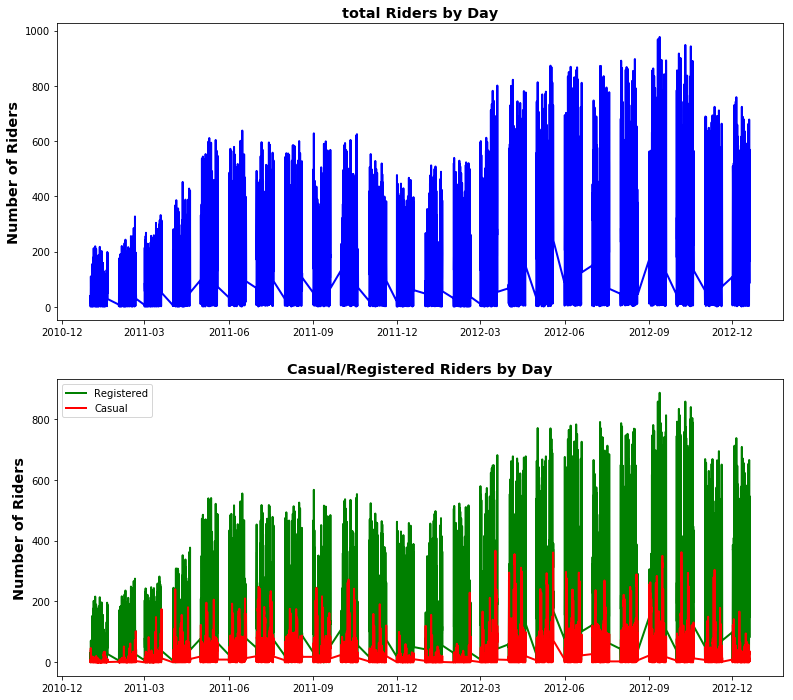

In [6]:
plt.figure(figsize=(13,12))
plt.subplot(211)
plt.plot(df['datetime'], df['count'], 'b')
plt.title('total Riders by Day')
plt.ylabel('Number of Riders')

plt.subplot(212)
plt.plot(df['datetime'], df['registered'], 'g')
plt.plot(df['datetime'], df['casual'],'r')
plt.title('Casual/Registered Riders by Day')
plt.ylabel('Number of Riders')
plt.legend(['Registered', 'Casual'], loc='upper left')


### 시간대별 대여량과 근무일의 대여량

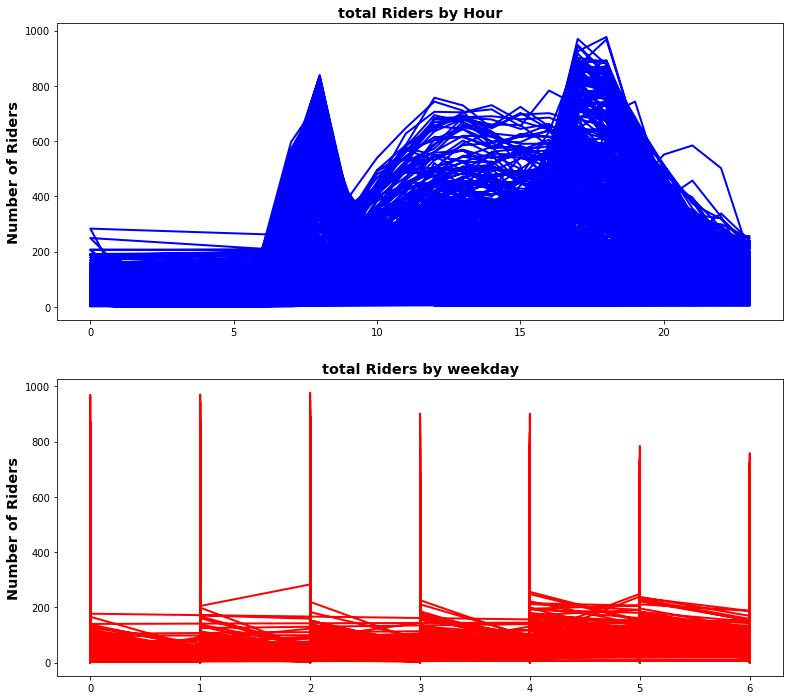

In [7]:
plt.figure(figsize=(13,12))
plt.subplot(211)
plt.plot(df['datetime'].dt.hour, df['count'], 'b')
plt.title('total Riders by Hour')
plt.ylabel('Number of Riders')

plt.subplot(212)
plt.plot(df['datetime'].dt.weekday, df['count'], 'r')
plt.title('total Riders by weekday')
plt.ylabel('Number of Riders')


매일 자전거 대여량을 보여준다. 계절에 따라 수치가 달라지는 것 같지만, 가입자와 미가입자의 패턴이 약간 다르다는 것을 볼 수 있다. 특히 1~2월에 미가입자들은 자전거 대여량이 확연하게 줄어든다.

### seaborn 을 사용해 시각화

[seaborn: statistical data visualization — seaborn 0.8.1 documentation](http://seaborn.pydata.org/index.html)

matplotlib을 사용하기 쉽게 래핑해 놓았다는 얘기처럼 훨씬 사용하기 편하다.

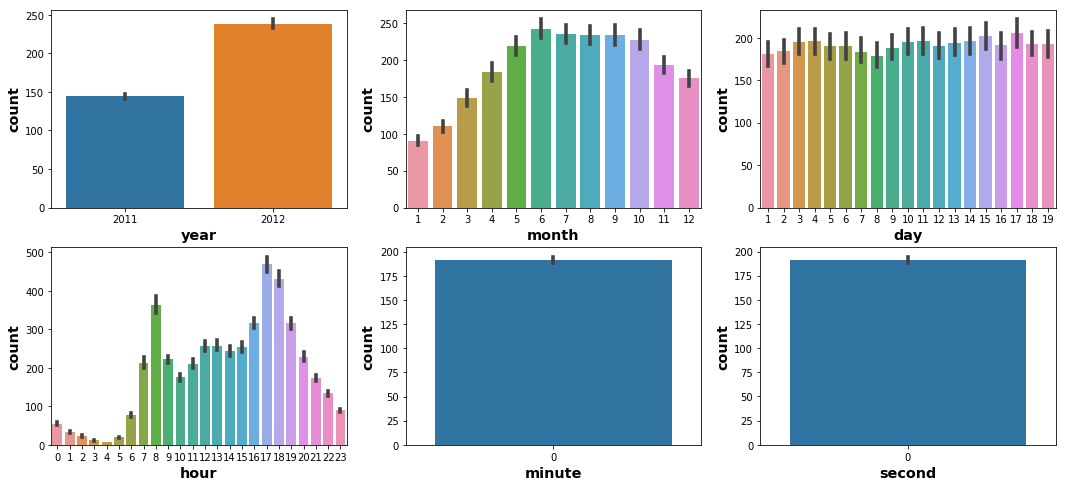

In [8]:
# 서브플롯을 생성
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=df, x="year", y="count", ax=ax1)
sns.barplot(data=df, x="month", y="count", ax=ax2)
sns.barplot(data=df, x="day", y="count", ax=ax3)
sns.barplot(data=df, x="hour", y="count", ax=ax4)
sns.barplot(data=df, x="minute", y="count", ax=ax5)
sns.barplot(data=df, x="second", y="count", ax=ax6)

### lesson learned
* 2011년 보다 2012년이 대여량이 많다.
* 1년 중 1월이 대여량이 가장 낮다. 6월이 대여량이 가장 높다.
* 날짜는 1일부터 19일까지의 데이터만 있다. 1일부터 19일까지의 대여량은 크게 차이가 없다. 그리고 테스트 데이터가 20일부터 30일까지의 데이터를 가지고 있기 때문에 사용할 수 없는 데이터이다.
* 시간 - 2~5시에는 대여량이 적다. 출퇴근 시간에 대여량이 많다.
* 분, 초는 변별력이 없다. 분과초는 00:00 이기 때문

### seaborn boxplot 추가 
* [여기를 참고함 Bike Sharing Demand | Kaggle](https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile/code/notebook)


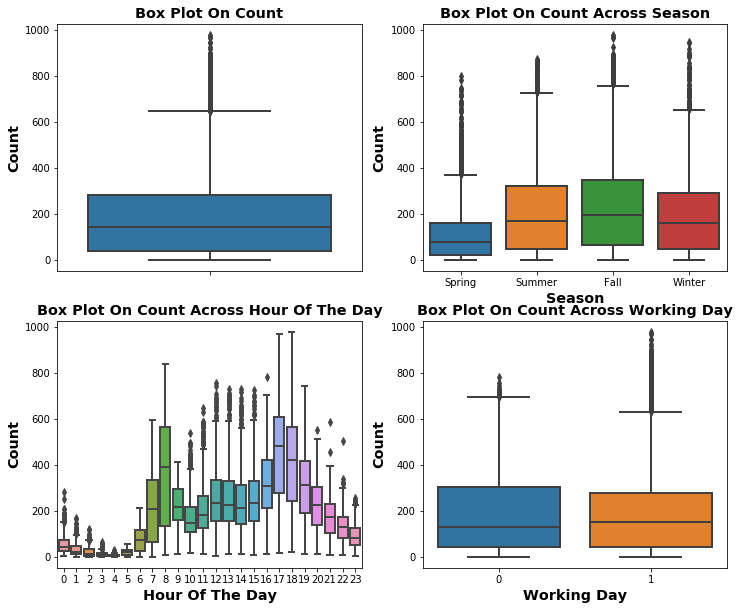

In [9]:
df["season"] = df["season"].map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })

figure, axes = plt.subplots(nrows=2,ncols=2)
figure.set_size_inches(12, 10)
sns.boxplot(data=df, y="count", orient="v", ax=axes[0][0])
sns.boxplot(data=df, y="count", x="season", orient="v", ax=axes[0][1])
sns.boxplot(data=df, y="count", x="hour", orient="v", ax=axes[1][0])
sns.boxplot(data=df, y="count", x="workingday", orient="v", ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

## 온도와 날씨

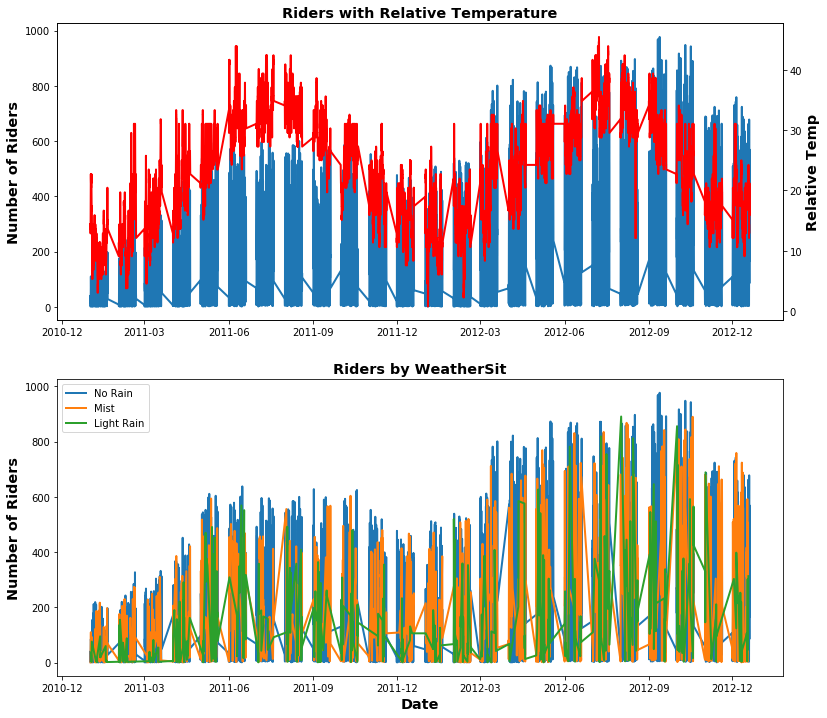

In [10]:
plt.figure(figsize=(13,12))
ax1 = plt.subplot(211)
plt.plot(df['datetime'], df['count'])
plt.title('Riders with Relative Temperature')
ax1.set_ylabel('Number of Riders')
# 수치의 기준이 다른 두가지 내용을 하나의 그래프에 표현
ax2 = ax1.twinx()
# df.head()
# 분포도에 대한 그래프를 표시해야 하는데 
# scatterplot_kwargs에서 오류가 나서 주석처리
# plt.plot(df['datetime'], df['atemp'], **scatterplot_kwargs(color='r'))
plt.plot(df['datetime'], df['atemp'], 'r')
ax2.set_ylabel('Relative Temp')
#ax1.set_ylim([0, 1e4])
#ax2.set_ylim([0, 1.0])

plt.subplot(212)
# df[df['weather'] == 1]
for weathersit,wcolor,label in zip([1,2,3], 
                                   ['b','g','r'],
                                   ['No Rain', 'Mist', 'Light Rain']):
    wsit_df = df[df['weather'] == weathersit]
# 산점도를 그려야 하는데 , **scatterplot_kwargs(color=wcolor) 을 추가시 오류가 나서 주석처리
#     plt.plot(wsit_df['datetime'], wsit_df['count'], label=label, **scatterplot_kwargs(color=wcolor))
    plt.plot(wsit_df['datetime'], wsit_df['count'], label=label)
plt.title('Riders by WeatherSit')
plt.xlabel('Date')
plt.ylabel('Number of Riders')
# plt.ylim([0, 1e4])
plt.legend(loc='upper left');

## 워킹데이와 아닌 날의 대여량

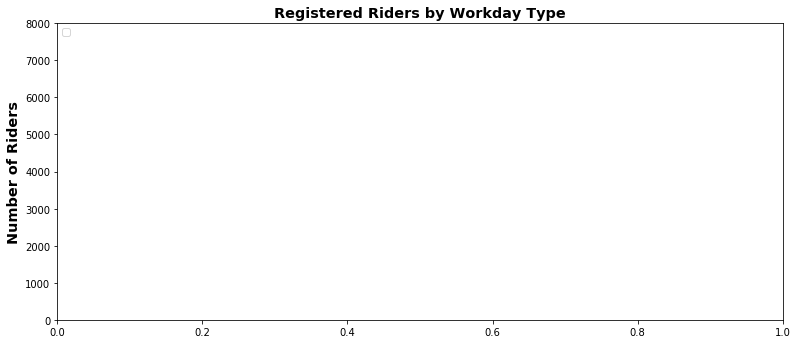

In [11]:
plt.figure(figsize=(13, 12))
plt.subplot(211)
for workingday, lcolor in zip([0,1],['b','r']):
    wd_df = df[df['workingday'] == workingday]
#     plt.plot(wd_df['datetime'], wd_df['registered'], **scatterplot_kwargs(color=lcolor))
plt.title('Registered Riders by Workday Type')
plt.ylabel('Number of Riders')
plt.ylim([0, 8e3])
plt.legend(['non-workday', 'workday'], loc='upper left')  

## Correlation and T-Tests

In [12]:
cols = ['registered', 'casual', 'count']
rows = ['year', 'month', 'temp', 'atemp', 'humidity', 'windspeed']
df.corr()[cols].loc[rows]

,registered,casual,count
year,0.264265,0.145241,0.260403
month,0.169451,0.092722,0.166862
temp,0.318571,0.467097,0.394454
atemp,0.314635,0.462067,0.389784
humidity,-0.265458,-0.348187,-0.317371
windspeed,0.091052,0.092276,0.101369


                year     month      hour      temp     atemp    casual  \
year        1.000000 -0.004932 -0.004234  0.061226  0.058540  0.145241   
month      -0.004932  1.000000 -0.006818  0.257589  0.264173  0.092722   
hour       -0.004234 -0.006818  1.000000  0.145430  0.140343  0.302045   
temp        0.061226  0.257589  0.145430  1.000000  0.984948  0.467097   
atemp       0.058540  0.264173  0.140343  0.984948  1.000000  0.462067   
casual      0.145241  0.092722  0.302045  0.467097  0.462067  1.000000   
registered  0.264265  0.169451  0.380540  0.318571  0.314635  0.497250   
humidity   -0.078606  0.204537 -0.278011 -0.064949 -0.043536 -0.348187   
windspeed  -0.015221 -0.150192  0.146631 -0.017852 -0.057473  0.092276   
count       0.260403  0.166862  0.400601  0.394454  0.389784  0.690414   

            registered  humidity  windspeed     count  
year          0.264265 -0.078606  -0.015221  0.260403  
month         0.169451  0.204537  -0.150192  0.166862  
hour          0.3

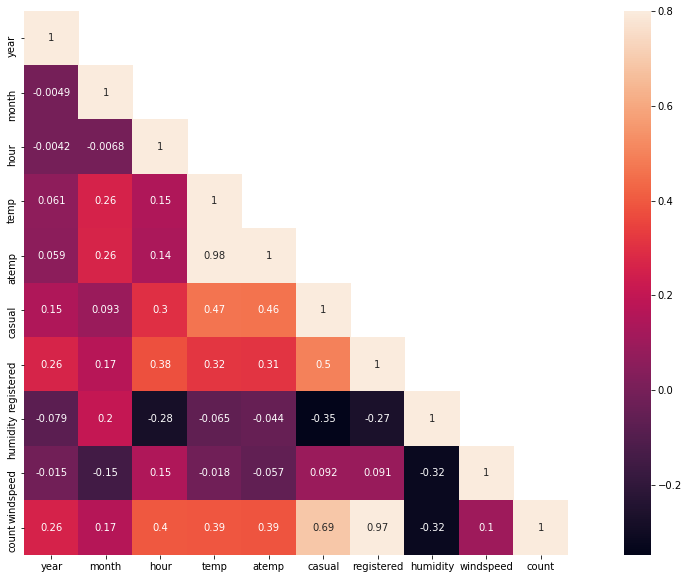

In [13]:
# 연관 데이터를 히트맵으로 시각화 해본다.
corrMatt = df[["year","month", "hour", "temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
figure, ax = plt.subplots()
figure.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)

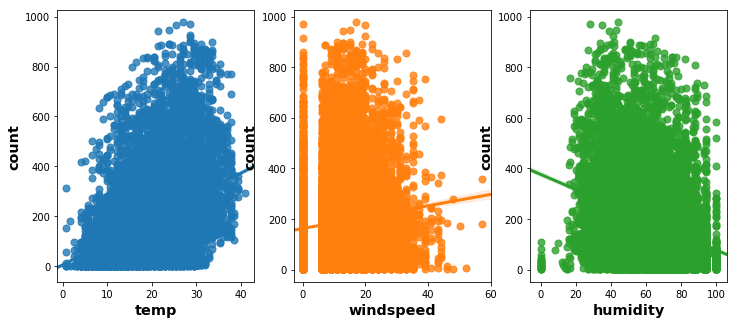

In [14]:
# 산점도로 기온, 풍속, 습도에 따른 차이를 본다.
figure, (ax1, ax2, ax3) = plt.subplots(ncols=3)
figure.set_size_inches(12,5)
sns.regplot(x="temp", y="count", data=df, ax=ax1)
sns.regplot(x="windspeed", y="count", data=df, ax=ax2)
sns.regplot(x="humidity", y="count", data=df, ax=ax3)

((array([-3.83154229, -3.60754977, -3.48462983, ...,  3.48462983,
          3.60754977,  3.83154229]),
  array([  1,   1,   1, ..., 968, 970, 977])),
 (169.82942673231375, 191.57413191254821, 0.93726827662131673))

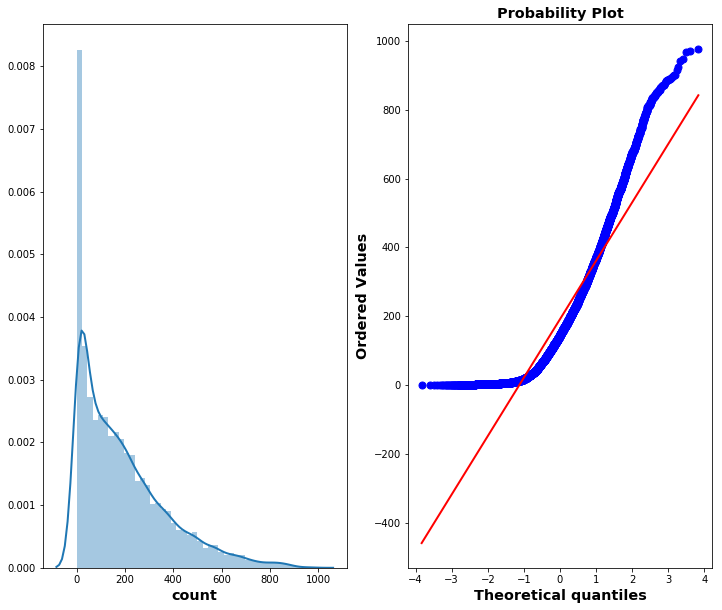

In [15]:
# 데이터 분포도를 파악
figure, ( ax1, ax2 ) = plt.subplots(ncols=2)
figure.set_size_inches(12, 10)
sns.distplot(df["count"], ax=ax1)
stats.probplot(df["count"], dist="norm", fit=True, plot=ax2)